In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from torch.utils.data import *

In [3]:
from torch import autograd 


# Let's first construct the points to cluster

In [4]:
#parameters for gaussian clusters
A = (0, 1.5)
sigmaA = 0.15
B = (-0.5, 0)
sigmaB = 0.1
n_pts = 500
C = (12.5, 0)
sigmaC = 1

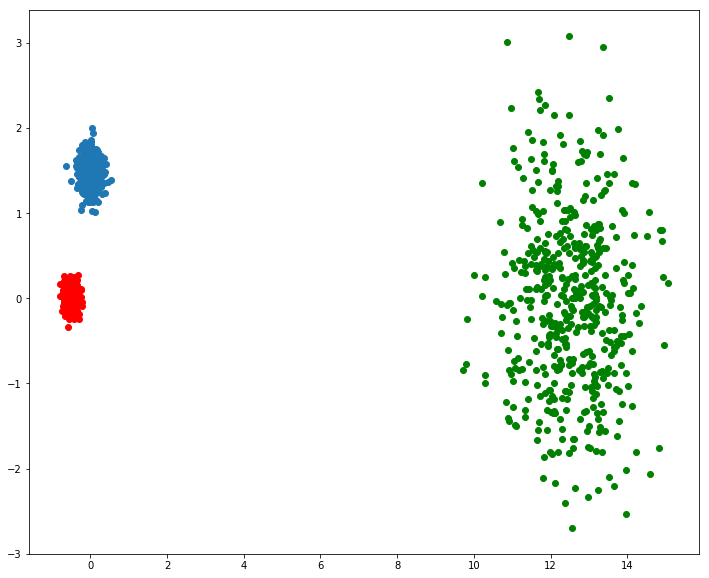

In [5]:
cluster1 = sigmaA * np.random.randn(n_pts, 2) + A
cluster2 = sigmaB * np.random.randn(n_pts, 2) + B
cluster3 = sigmaC * np.random.randn(n_pts, 2) + C
list_pts = np.concatenate((cluster1, cluster2, cluster3))
list_labels = np.array([0 for i in range(n_pts)] + [1 for i in range(n_pts)] + [2 for i in range(n_pts)])
list_indices = [i for i in range(len(list_labels))]
np.random.shuffle(list_indices)
list_pts = list_pts[list_indices]
list_labels = list_labels[list_indices]


# Plot the gaussian clusters
plt.figure(figsize=(12, 10))
plt.scatter(cluster1[:, 0], cluster1[:, 1])
plt.scatter(cluster2[:, 0], cluster2[:, 1], c="r")
plt.scatter(cluster3[:, 0], cluster3[:, 1], c="g")

In [6]:
# Parameters for moon clusters
n_samples = 1500
noise = .05

[0 0 0 ..., 0 1 1]


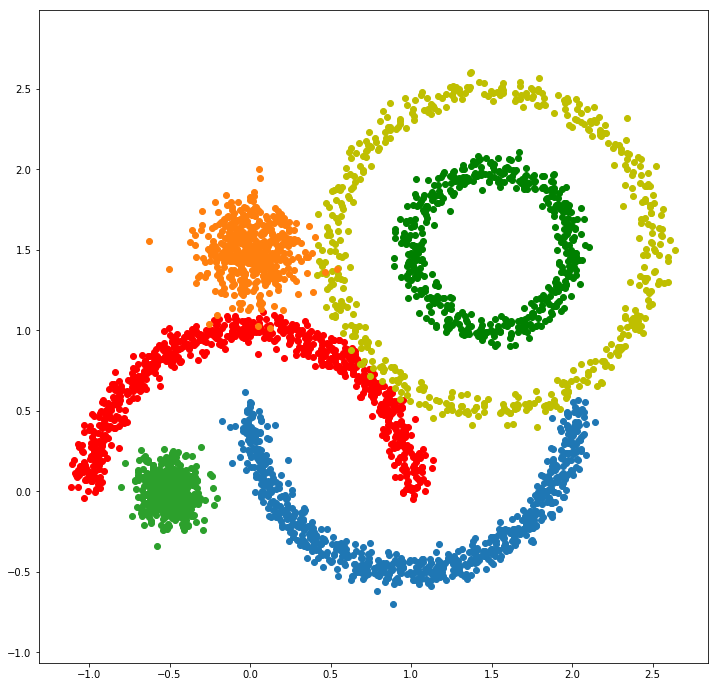

In [7]:
noisy_moons = datasets.make_moons(n_samples=1500, noise=.05)
circles = datasets.make_circles(n_samples = 1000, noise = 0.05, factor=0.5)
circles[0][:, 0] += np.ones(len(circles[0][:, 0])) * 1.5
circles[0][:, 1] += np.ones(len(circles[0][:, 1])) * 1.5

print(noisy_moons[1])
# Plot the moon clusters
plt.figure(figsize = (12, 12))
plt.axis("equal")
mask = noisy_moons[1].astype("bool")
plt.scatter(noisy_moons[0][mask][:, 0], noisy_moons[0][mask][:, 1])
mask = (np.ones(len(noisy_moons[1])) - noisy_moons[1]).astype("bool")
plt.scatter(noisy_moons[0][mask][:, 0], noisy_moons[0][mask][:, 1], c="r")
# Plot the circles
mask = circles[1].astype("bool")
plt.scatter(circles[0][mask][:, 0], circles[0][mask][:, 1], c="g")
mask = (np.ones(len(circles[1])) - circles[1]).astype("bool")
plt.scatter(circles[0][mask][:, 0], circles[0][mask][:, 1], c="y")
# Plot the blobs
plt.scatter(cluster1[:, 0], cluster1[:, 1])
plt.scatter(cluster2[:, 0], cluster2[:, 1])

# Now let's build our first net (~logistic regression)

In [8]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 6, True)
        self.fc2 = nn.LogSoftmax()
        self.criterion = nn.NLLLoss()

    def forward(self, x):
        x = x.view(-1, self.num_flat_features(x))
        x = self.fc1(x)
        x = self.fc2(x)
        return x
    
    def fit(self, X, y):
        optimizer = optim.SGD(net.parameters(), lr=0.2, momentum=0.1)
        print(y.shape)
        input = torch.from_numpy(X)
        target = torch.from_numpy(y)
        dataset = TensorDataset(input, target)
        trainloader = DataLoader(dataset, batch_size = 50)

        for epoch in range(100):
            for data in trainloader:
                input, target = data
                target = target.view(-1)
                input, target = Variable(input).float(), Variable(target).long()
                optimizer.zero_grad()
                output = self(input)
                loss = self.criterion(output, target)
                loss.backward()
                optimizer.step()
            if epoch == 1:
                print(loss)
        print(loss)
        
    def predict(self, X):
        input = Variable(torch.from_numpy(X)).float()
        output = net(input)
        predicted = torch.max(output.data, 1)[1]
        return predicted.numpy()
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    


In [9]:
# Plot parameters 
plot_step = 0.02  # fine step width for decision surface contours
cmap = plt.cm.Blues

Net (
  (fc1): Linear (2 -> 6)
  (fc2): LogSoftmax ()
  (criterion): NLLLoss (
  )
)
(1500,)
Variable containing:
 0.1293
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-03 *
  2.0983
[torch.FloatTensor of size 1]



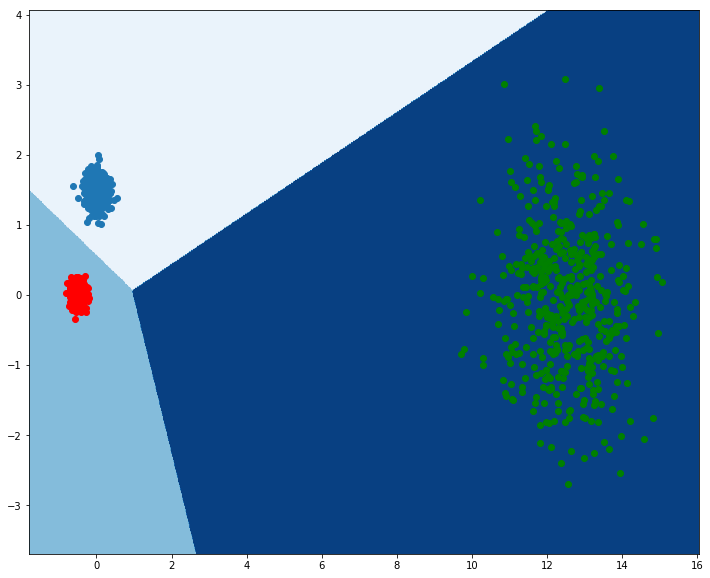

In [10]:
net = Net()
print(net)

# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot

x_min, x_max = list_pts[:, 0].min() - 1, list_pts[:, 0].max() + 1
y_min, y_max = list_pts[:, 1].min() - 1, list_pts[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

net.fit(list_pts, list_labels)
Z = net.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 10))
cs = plt.contourf(xx, yy, Z, cmap=cmap)
plt.scatter(cluster1[:, 0], cluster1[:, 1])
plt.scatter(cluster2[:, 0], cluster2[:, 1], c="r")
plt.scatter(cluster3[:, 0], cluster3[:, 1], c="g")

Net (
  (fc1): Linear (2 -> 6)
  (fc2): LogSoftmax ()
  (criterion): NLLLoss (
  )
)
(3500,)
Variable containing:
 0.4755
[torch.FloatTensor of size 1]

Variable containing:
 0.2186
[torch.FloatTensor of size 1]



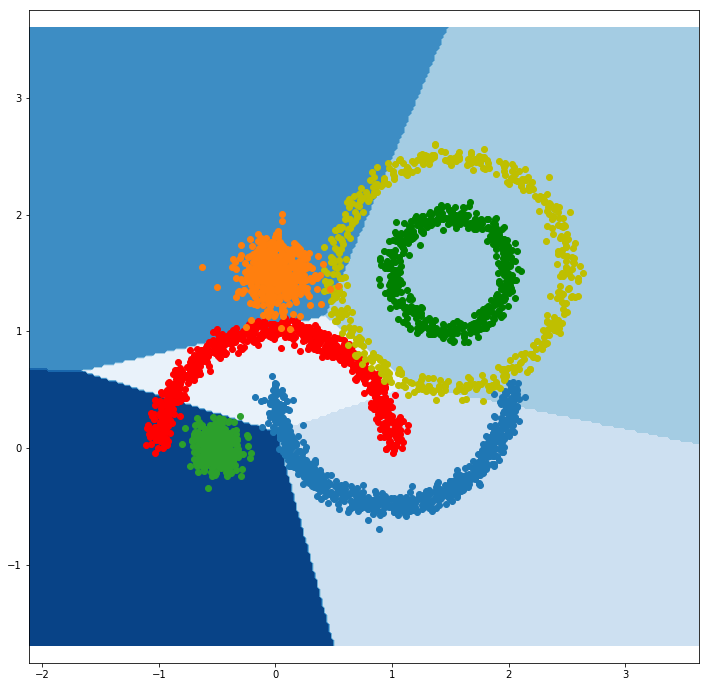

In [11]:
net = Net()
print(net)

list_pts2 = np.concatenate((noisy_moons[0], circles[0], cluster1, cluster2))
list_labels2= np.concatenate((noisy_moons[1], circles[1] + 2 * np.ones(len(circles[0])), 4 * np.ones(len(cluster1)), 5 * np.ones(len(cluster2))))

x_min, x_max = list_pts2[:, 0].min() - 1, list_pts2[:, 0].max() + 1
y_min, y_max = list_pts2[:, 1].min() - 1, list_pts2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

net.fit(list_pts2, list_labels2)
Z1 = net.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)

# Plot the contour
plt.figure(figsize=(12, 12))
cs = plt.contourf(xx, yy, Z1, cmap=plt.cm.Blues)

# Plot the moon clusters
plt.axis("equal")
mask = noisy_moons[1].astype("bool")
plt.scatter(noisy_moons[0][mask][:, 0], noisy_moons[0][mask][:, 1])
mask = (np.ones(len(noisy_moons[1])) - noisy_moons[1]).astype("bool")
plt.scatter(noisy_moons[0][mask][:, 0], noisy_moons[0][mask][:, 1], c="r")
# Plot the circles
mask = circles[1].astype("bool")
plt.scatter(circles[0][mask][:, 0], circles[0][mask][:, 1], c="g")
mask = (np.ones(len(circles[1])) - circles[1]).astype("bool")
plt.scatter(circles[0][mask][:, 0], circles[0][mask][:, 1], c="y")
# Plot the blobs
plt.scatter(cluster1[:, 0], cluster1[:, 1])
plt.scatter(cluster2[:, 0], cluster2[:, 1])

# Now let's make it fancier

In [12]:
# 1 hidden layer of width 5 (WARNING : results vary a lot with inizialisation)

class Net2(nn.Module):
    
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(2, 5, True)
        #self.fc2 = nn.Linear(2, 20, True)
        self.fc4 = nn.Linear(5, 6, True)
        self.fc5 = nn.LogSoftmax()
        self.criterion = nn.NLLLoss()

    def forward(self, x):
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc4(x)
        x = self.fc5(x)
        return x
    
    def fit(self, X, y):
        optimizer = optim.Adam(net.parameters(), lr=0.05)
        print(y.shape)
        input = torch.from_numpy(X)
        target = torch.from_numpy(y)
        dataset = TensorDataset(input, target)
        trainloader = DataLoader(dataset, batch_size = 32)

        for epoch in range(100):
            for data in trainloader:
                input, target = data
                target = target.view(-1)
                input, target = Variable(input).float(), Variable(target).long()
                optimizer.zero_grad()
                output = self(input)
                loss = self.criterion(output, target)
                loss.backward()
                optimizer.step()
            if epoch == 1:
                print(loss)
        print(loss)
        
    def predict(self, X):
        input = Variable(torch.from_numpy(X)).float()
        output = net(input)
        predicted = torch.max(output.data, 1)[1]
        return predicted.numpy()
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

Net2 (
  (fc1): Linear (2 -> 5)
  (fc4): Linear (5 -> 6)
  (fc5): LogSoftmax ()
  (criterion): NLLLoss (
  )
)
(3500,)
Variable containing:
 1.1314
[torch.FloatTensor of size 1]

Variable containing:
 0.7480
[torch.FloatTensor of size 1]



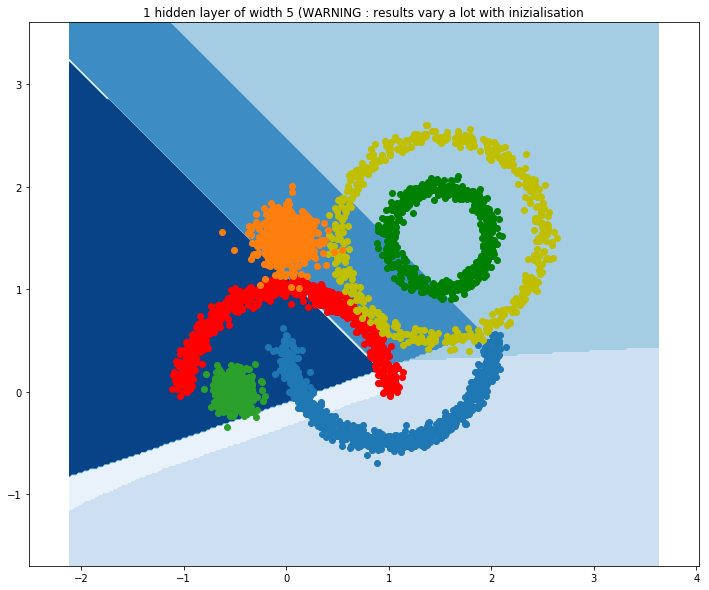

In [13]:
net = Net2()
print(net)
list_pts2 = np.concatenate((noisy_moons[0], circles[0], cluster1, cluster2))
list_labels2= np.concatenate((noisy_moons[1], circles[1] + 2 * np.ones(len(circles[0])), 4 * np.ones(len(cluster1)), 5 * np.ones(len(cluster2))))

x_min, x_max = list_pts2[:, 0].min() - 1, list_pts2[:, 0].max() + 1
y_min, y_max = list_pts2[:, 1].min() - 1, list_pts2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

net.fit(list_pts2, list_labels2)
Z2 = net.predict(np.c_[xx.ravel(), yy.ravel()])
Z2= Z2.reshape(xx.shape)

# Plot the contour 
plt.figure(figsize=(12, 10))
plt.title("1 hidden layer of width 5 (WARNING : results vary a lot with inizialisation")
cs = plt.contourf(xx, yy, Z2, cmap=plt.cm.Blues)

# Plot the moon clusters
plt.axis("equal")
mask = noisy_moons[1].astype("bool")
plt.scatter(noisy_moons[0][mask][:, 0], noisy_moons[0][mask][:, 1])
mask = (np.ones(len(noisy_moons[1])) - noisy_moons[1]).astype("bool")
plt.scatter(noisy_moons[0][mask][:, 0], noisy_moons[0][mask][:, 1], c="r")
# Plot the circles
mask = circles[1].astype("bool")
plt.scatter(circles[0][mask][:, 0], circles[0][mask][:, 1], c="g")
mask = (np.ones(len(circles[1])) - circles[1]).astype("bool")
plt.scatter(circles[0][mask][:, 0], circles[0][mask][:, 1], c="y")
# Plot the blobs
plt.scatter(cluster1[:, 0], cluster1[:, 1])
plt.scatter(cluster2[:, 0], cluster2[:, 1])

In [21]:
# 4 hidden layer of width 7

class Net3(nn.Module):
    
    def __init__(self):
        super(Net3, self).__init__()
        self.fc1 = nn.Linear(2, 7, True)
        self.fc2 = nn.Linear(7, 7, True)
        self.fc3 = nn.Linear(7, 7, True)
        self.fc4 = nn.Linear(7, 7, True)
        self.fc5 = nn.Linear(7, 6, True)
        self.fc6 = nn.LogSoftmax()
        self.criterion = nn.NLLLoss()

    def forward(self, x):
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        X = self.fc5(x)
        x = self.fc6(x)
        return x
    
    def fit(self, X, y):
        optimizer = optim.Adam(net.parameters(), lr=0.05)
        print(y.shape)
        input = torch.from_numpy(X)
        target = torch.from_numpy(y)
        dataset = TensorDataset(input, target)
        trainloader = DataLoader(dataset, batch_size = 32)

        for epoch in range(100):
            for data in trainloader:
                input, target = data
                target = target.view(-1)
                input, target = Variable(input).float(), Variable(target).long()
                optimizer.zero_grad()
                output = self(input)
                loss = self.criterion(output, target)
                loss.backward()
                optimizer.step()
            if epoch == 1:
                print(loss)
        print(loss)
        
    def predict(self, X):
        input = Variable(torch.from_numpy(X)).float()
        output = net(input)
        predicted = torch.max(output.data, 1)[1]
        return predicted.numpy()
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

Net3 (
  (fc1): Linear (2 -> 7)
  (fc2): Linear (7 -> 7)
  (fc3): Linear (7 -> 7)
  (fc4): Linear (7 -> 7)
  (fc5): Linear (7 -> 6)
  (fc6): LogSoftmax ()
  (criterion): NLLLoss (
  )
)
[ 0.  1.  2.  3.  4.  5.]
(3500,)
Variable containing:
 1.9459
[torch.FloatTensor of size 1]

Variable containing:
 1.9459
[torch.FloatTensor of size 1]



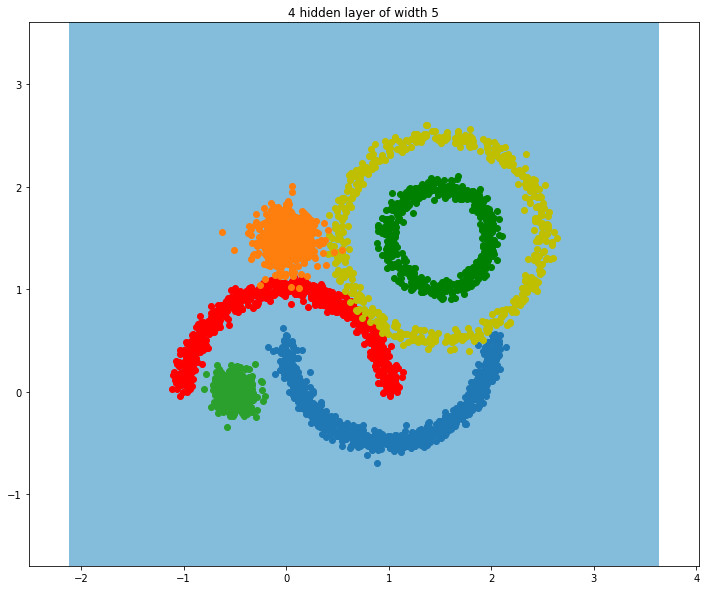

In [22]:
net = Net3()
print(net)
list_pts2 = np.concatenate((noisy_moons[0], circles[0], cluster1, cluster2))
list_labels2 = np.concatenate((noisy_moons[1], circles[1] + 2 * np.ones(len(circles[0])), 4 * np.ones(len(cluster1)), 5 * np.ones(len(cluster2))))
print(np.unique(list_labels2))
x_min, x_max = list_pts2[:, 0].min() - 1, list_pts2[:, 0].max() + 1
y_min, y_max = list_pts2[:, 1].min() - 1, list_pts2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

net.fit(list_pts2, list_labels2)
Z3 = net.predict(np.c_[xx.ravel(), yy.ravel()])
Z3 = Z3.reshape(xx.shape)

# Plot the contour 
plt.figure(figsize=(12, 10))
plt.title("4 hidden layer of width 5")
cs = plt.contourf(xx, yy, Z3, cmap=plt.cm.Blues)

# Plot the moon clusters
plt.axis("equal")
mask = noisy_moons[1].astype("bool")
plt.scatter(noisy_moons[0][mask][:, 0], noisy_moons[0][mask][:, 1])
mask = (np.ones(len(noisy_moons[1])) - noisy_moons[1]).astype("bool")
plt.scatter(noisy_moons[0][mask][:, 0], noisy_moons[0][mask][:, 1], c="r")
# Plot the circles
mask = circles[1].astype("bool")
plt.scatter(circles[0][mask][:, 0], circles[0][mask][:, 1], c="g")
mask = (np.ones(len(circles[1])) - circles[1]).astype("bool")
plt.scatter(circles[0][mask][:, 0], circles[0][mask][:, 1], c="y")
# Plot the blobs
plt.scatter(cluster1[:, 0], cluster1[:, 1])
plt.scatter(cluster2[:, 0], cluster2[:, 1])

In [16]:
# 1 hidden layer of width 20

class Net4(nn.Module):
    
    def __init__(self):
        super(Net4, self).__init__()
        self.fc1 = nn.Linear(2, 20, True)
        #self.fc2 = nn.Linear(2, 20, True)
        self.fc4 = nn.Linear(20, 6, True)
        self.fc5 = nn.LogSoftmax()
        self.criterion = nn.NLLLoss()

    def forward(self, x):
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x = self.fc4(x)
        x = self.fc5(x)
        return x
    
    def fit(self, X, y):
        optimizer = optim.SGD(net.parameters(), lr=0.2, momentum=0.1)
        input = torch.from_numpy(X)
        target = torch.from_numpy(y)
        dataset = TensorDataset(input, target)
        trainloader = DataLoader(dataset, batch_size = 50)

        for epoch in range(100):
            for data in trainloader:
                input, target = data
                target = target.view(-1)
                input, target = Variable(input).float(), Variable(target).long()
                optimizer.zero_grad()
                output = self(input)
                loss = self.criterion(output, target)
                loss.backward()
                optimizer.step()
            if epoch == 1:
                print(loss)
        print(loss)
        
    def predict(self, X):
        input = Variable(torch.from_numpy(X)).float()
        output = net(input)
        predicted = torch.max(output.data, 1)[1]
        return predicted.numpy()
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

Net4 (
  (fc1): Linear (2 -> 20)
  (fc4): Linear (20 -> 6)
  (fc5): LogSoftmax ()
  (criterion): NLLLoss (
  )
)
Variable containing:
1.00000e-02 *
  4.9561
[torch.FloatTensor of size 1]

Variable containing:
1.00000e-03 *
  3.6096
[torch.FloatTensor of size 1]



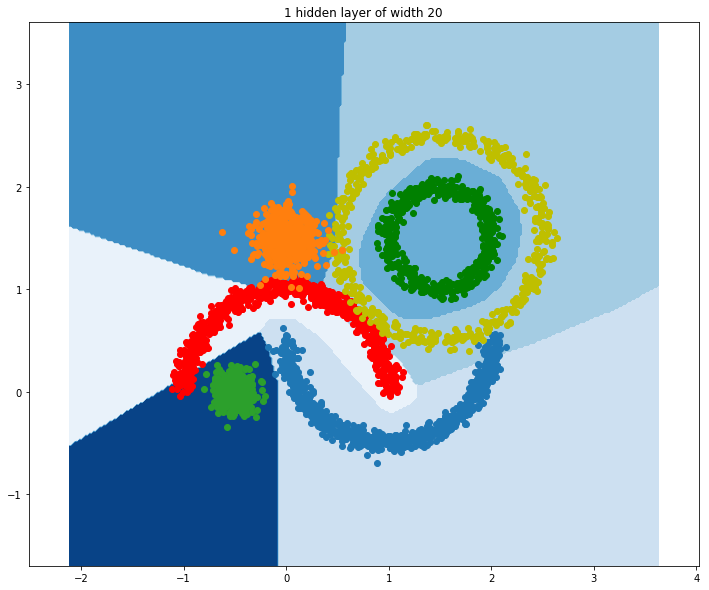

In [17]:
net = Net4()
print(net)
list_pts2 = np.concatenate((noisy_moons[0], circles[0], cluster1, cluster2))
list_labels2= np.concatenate((noisy_moons[1], circles[1] + 2 * np.ones(len(circles[0])), 4 * np.ones(len(cluster1)), 5 * np.ones(len(cluster2))))

x_min, x_max = list_pts2[:, 0].min() - 1, list_pts2[:, 0].max() + 1
y_min, y_max = list_pts2[:, 1].min() - 1, list_pts2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

net.fit(list_pts2, list_labels2)
Z4 = net.predict(np.c_[xx.ravel(), yy.ravel()])
Z4 = Z4.reshape(xx.shape)

# Plot the contour 
plt.figure(figsize=(12, 10))
plt.title("1 hidden layer of width 20")
cs = plt.contourf(xx, yy, Z4, cmap=plt.cm.Blues)

# Plot the moon clusters
plt.axis("equal")
mask = noisy_moons[1].astype("bool")
plt.scatter(noisy_moons[0][mask][:, 0], noisy_moons[0][mask][:, 1])
mask = (np.ones(len(noisy_moons[1])) - noisy_moons[1]).astype("bool")
plt.scatter(noisy_moons[0][mask][:, 0], noisy_moons[0][mask][:, 1], c="r")
# Plot the circles
mask = circles[1].astype("bool")
plt.scatter(circles[0][mask][:, 0], circles[0][mask][:, 1], c="g")
mask = (np.ones(len(circles[1])) - circles[1]).astype("bool")
plt.scatter(circles[0][mask][:, 0], circles[0][mask][:, 1], c="y")
# Plot the blobs
plt.scatter(cluster1[:, 0], cluster1[:, 1])
plt.scatter(cluster2[:, 0], cluster2[:, 1])

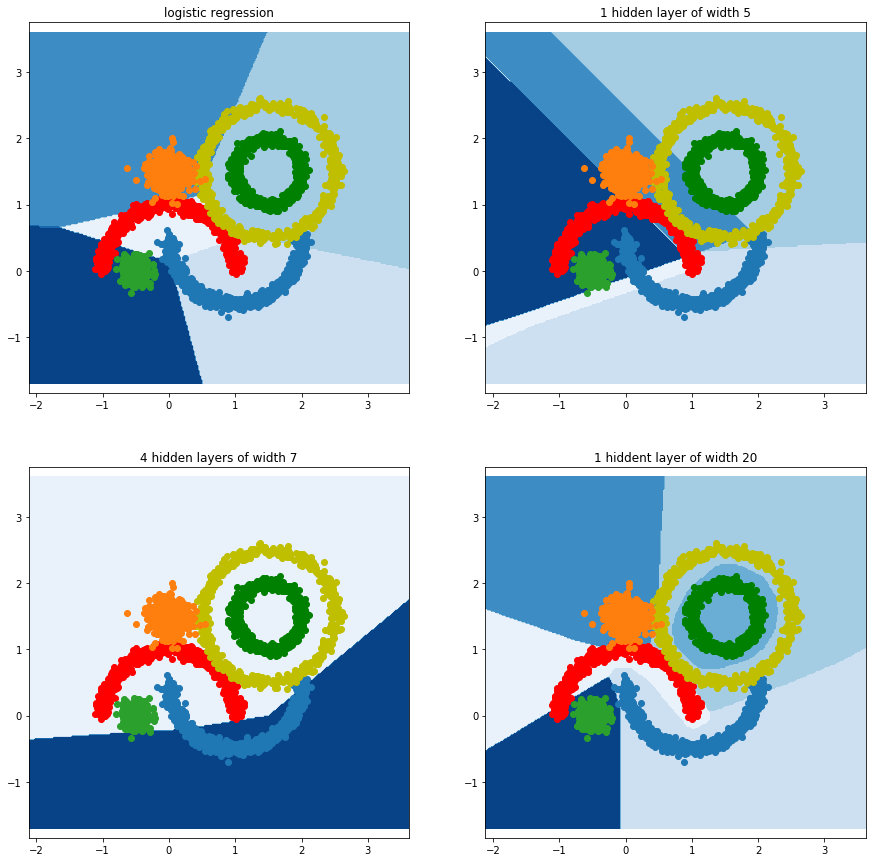

In [18]:
list_contours = [Z1, Z2, Z3, Z4]
list_titles = ["logistic regression", "1 hidden layer of width 5", "4 hidden layers of width 7", "1 hiddent layer of width 20"]
f, ax = plt.subplots(2, 2, figsize=(15, 15))
ax = ax.flatten()
for i in range(4):
    ax[i].axis("equal")
    ax[i].set_title(list_titles[i])
    cs = ax[i].contourf(xx, yy, list_contours[i], cmap=cmap)
    # Plot the moon clusters
    mask = noisy_moons[1].astype("bool")
    ax[i].scatter(noisy_moons[0][mask][:, 0], noisy_moons[0][mask][:, 1])
    mask = (np.ones(len(noisy_moons[1])) - noisy_moons[1]).astype("bool")
    ax[i].scatter(noisy_moons[0][mask][:, 0], noisy_moons[0][mask][:, 1], c="r")
    # Plot the circles
    mask = circles[1].astype("bool")
    ax[i].scatter(circles[0][mask][:, 0], circles[0][mask][:, 1], c="g")
    mask = (np.ones(len(circles[1])) - circles[1]).astype("bool")
    ax[i].scatter(circles[0][mask][:, 0], circles[0][mask][:, 1], c="y")
    # Plot the blobs
    ax[i].scatter(cluster1[:, 0], cluster1[:, 1])
    ax[i].scatter(cluster2[:, 0], cluster2[:, 1])
